In [120]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [121]:

df = pd.read_csv('climate.csv')
df.head(10)

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,0,Albania,Maize,1990,1485,121.0,16.37,36613
1,1,Albania,Potatoes,1990,1485,121.0,16.37,66667
2,2,Albania,"Rice, paddy",1990,1485,121.0,16.37,23333
3,3,Albania,Sorghum,1990,1485,121.0,16.37,12500
4,4,Albania,Soybeans,1990,1485,121.0,16.37,7000
5,5,Albania,Wheat,1990,1485,121.0,16.37,30197
6,6,Albania,Maize,1991,1485,121.0,15.36,29068
7,7,Albania,Potatoes,1991,1485,121.0,15.36,77818
8,8,Albania,"Rice, paddy",1991,1485,121.0,15.36,28538
9,9,Albania,Sorghum,1991,1485,121.0,15.36,6667


In [154]:
df.shape

(28242, 8)

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     28242 non-null  int64  
 1   Area                           28242 non-null  object 
 2   Item                           28242 non-null  object 
 3   Year                           28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  int64  
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
 7   hg/ha_yield                    28242 non-null  int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 1.7+ MB


In [124]:
df.describe()

,Unnamed: 0,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000,28242.000000
mean,14120.500000,2001.544296,1149.05598,37076.909344,20.542627,77053.332094
std,8152.907488,7.051905,709.81215,59958.784665,6.312051,84956.612897
min,0.000000,1990.000000,51.00000,0.040000,1.300000,50.000000
25%,7060.250000,1995.000000,593.00000,1702.000000,16.702500,19919.250000
50%,14120.500000,2001.000000,1083.00000,17529.440000,21.510000,38295.000000
75%,21180.750000,2008.000000,1668.00000,48687.880000,26.000000,104676.750000
max,28241.000000,2013.000000,3240.00000,367778.000000,30.650000,501412.000000


In [125]:
df.isnull().sum()

Unnamed: 0                       0
Area                             0
Item                             0
Year                             0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
hg/ha_yield                      0
dtype: int64

In [126]:
df["Item"].value_counts()
# no of occurances inside a column 

Item
Potatoes                4276
Maize                   4121
Wheat                   3857
Rice, paddy             3388
Soybeans                3223
Sorghum                 3039
Sweet potatoes          2890
Cassava                 2045
Yams                     847
Plantains and others     556
Name: count, dtype: int64

In [127]:
# partitioning the data frames 
df0 = df[df['Item'] == 'Potatoes']
df1 = df[df['Item'] == 'Maize']
df2 = df[df['Item'] == 'Wheat']
df3 = df[df['Item'] == 'Rice, paddy']
df4 = df[df['Item'] == 'Soybeans']
df5 = df[df['Item'] == 'Sorghum']
df6 = df[df['Item'] == 'Sweet potatoes']
df7 = df[df['Item'] == 'Cassava']
df8 = df[df['Item'] == 'Yams']
df9 = df[df['Item'] == 'Plantains and others']

In [128]:
df2.head()

,Unnamed: 0,Area,Item,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
5,5,Albania,Wheat,1990,1485,121.0,16.37,30197
11,11,Albania,Wheat,1991,1485,121.0,15.36,20698
17,17,Albania,Wheat,1992,1485,121.0,16.06,24388
22,22,Albania,Wheat,1993,1485,121.0,16.05,29976
26,26,Albania,Wheat,1994,1485,201.0,16.96,24745


Data Visualisation Here

This is for the rainfall vs yeild 

In [129]:
import plotly.subplots as sp
# this is for creating a subplot 
import plotly.graph_objs as go
# this is used for creating a new graph and for using .scatter function 

fig = sp.make_subplots(rows=2, cols=5, subplot_titles=['Potatoes', 'Maize', 'Wheat', 'Rice', 'Soybeans','Sweet potatoes', 'Cassava', 'Yams', 'Plantains', 'Sorghum'])

fig.add_trace(go.Scatter(x=df0["average_rain_fall_mm_per_year"], y=df0["hg/ha_yield"]), row=1, col=1)
fig.add_trace(go.Scatter(x=df1["average_rain_fall_mm_per_year"], y=df1["hg/ha_yield"]), row=1, col=2)
fig.add_trace(go.Scatter(x=df2["average_rain_fall_mm_per_year"], y=df2["hg/ha_yield"]), row=1, col=3)
fig.add_trace(go.Scatter(x=df3["average_rain_fall_mm_per_year"], y=df3["hg/ha_yield"]), row=1, col=4)
fig.add_trace(go.Scatter(x=df4["average_rain_fall_mm_per_year"], y=df4["hg/ha_yield"]), row=1, col=5)
fig.add_trace(go.Scatter(x=df5["average_rain_fall_mm_per_year"], y=df5["hg/ha_yield"]), row=2, col=1)
fig.add_trace(go.Scatter(x=df6["average_rain_fall_mm_per_year"], y=df6["hg/ha_yield"]), row=2, col=2)
fig.add_trace(go.Scatter(x=df7["average_rain_fall_mm_per_year"], y=df7["hg/ha_yield"]), row=2, col=3)
fig.add_trace(go.Scatter(x=df8["average_rain_fall_mm_per_year"], y=df8["hg/ha_yield"]), row=2, col=4)
fig.add_trace(go.Scatter(x=df9["average_rain_fall_mm_per_year"], y=df9["hg/ha_yield"]), row=2, col=5)

fig.update_layout(title_text='Effect of Average Rainfall on Yield', height=700, showlegend=False)
fig.show()


temperature vs yeild 

In [131]:
import plotly.subplots as sp
# this is for creating a subplot 
import plotly.graph_objs as go
# this is used for creating a new graph and for using .scatter function 

fig = sp.make_subplots(rows=2, cols=5, subplot_titles=['Potatoes', 'Maize', 'Wheat', 'Rice', 'Soybeans','Sweet potatoes', 'Cassava', 'Yams', 'Plantains', 'Sorghum'])

fig.add_trace(go.Scatter(x=df0["avg_temp"], y=df0["hg/ha_yield"]), row=1, col=1)
fig.add_trace(go.Scatter(x=df1["avg_temp"], y=df1["hg/ha_yield"]), row=1, col=2)
fig.add_trace(go.Scatter(x=df2["avg_temp"], y=df2["hg/ha_yield"]), row=1, col=3)
fig.add_trace(go.Scatter(x=df3["avg_temp"], y=df3["hg/ha_yield"]), row=1, col=4)
fig.add_trace(go.Scatter(x=df4["avg_temp"], y=df4["hg/ha_yield"]), row=1, col=5)
fig.add_trace(go.Scatter(x=df5["avg_temp"], y=df5["hg/ha_yield"]), row=2, col=1)
fig.add_trace(go.Scatter(x=df6["avg_temp"], y=df6["hg/ha_yield"]), row=2, col=2)
fig.add_trace(go.Scatter(x=df7["avg_temp"], y=df7["hg/ha_yield"]), row=2, col=3)
fig.add_trace(go.Scatter(x=df8["avg_temp"], y=df8["hg/ha_yield"]), row=2, col=4)
fig.add_trace(go.Scatter(x=df9["avg_temp"], y=df9["hg/ha_yield"]), row=2, col=5)

fig.update_layout(title_text='Effect of Average Rainfall on Yield', height=700, showlegend=False)
fig.show()


pestiside vs yeild 

In [132]:
import plotly.subplots as sp
# this is for creating a subplot 
import plotly.graph_objs as go
# this is used for creating a new graph and for using .scatter function 

fig = sp.make_subplots(rows=2, cols=5, subplot_titles=['Potatoes', 'Maize', 'Wheat', 'Rice', 'Soybeans','Sweet potatoes', 'Cassava', 'Yams', 'Plantains', 'Sorghum'])

fig.add_trace(go.Scatter(x=df0["pesticides_tonnes"], y=df0["hg/ha_yield"]), row=1, col=1)
fig.add_trace(go.Scatter(x=df1["pesticides_tonnes"], y=df1["hg/ha_yield"]), row=1, col=2)
fig.add_trace(go.Scatter(x=df2["pesticides_tonnes"], y=df2["hg/ha_yield"]), row=1, col=3)
fig.add_trace(go.Scatter(x=df3["pesticides_tonnes"], y=df3["hg/ha_yield"]), row=1, col=4)
fig.add_trace(go.Scatter(x=df4["pesticides_tonnes"], y=df4["hg/ha_yield"]), row=1, col=5)
fig.add_trace(go.Scatter(x=df5["pesticides_tonnes"], y=df5["hg/ha_yield"]), row=2, col=1)
fig.add_trace(go.Scatter(x=df6["pesticides_tonnes"], y=df6["hg/ha_yield"]), row=2, col=2)
fig.add_trace(go.Scatter(x=df7["pesticides_tonnes"], y=df7["hg/ha_yield"]), row=2, col=3)
fig.add_trace(go.Scatter(x=df8["pesticides_tonnes"], y=df8["hg/ha_yield"]), row=2, col=4)
fig.add_trace(go.Scatter(x=df9["pesticides_tonnes"], y=df9["hg/ha_yield"]), row=2, col=5)

fig.update_layout(title_text='Effect of Average Rainfall on Yield', height=700, showlegend=False)
fig.show()


In [133]:
data = df.drop(["Year"], axis=1)  
# removed the year column as its not required now
# removing columns 

In [134]:
data.head(10)

,Unnamed: 0,Area,Item,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield
0,0,Albania,Maize,1485,121.0,16.37,36613
1,1,Albania,Potatoes,1485,121.0,16.37,66667
2,2,Albania,"Rice, paddy",1485,121.0,16.37,23333
3,3,Albania,Sorghum,1485,121.0,16.37,12500
4,4,Albania,Soybeans,1485,121.0,16.37,7000
5,5,Albania,Wheat,1485,121.0,16.37,30197
6,6,Albania,Maize,1485,121.0,15.36,29068
7,7,Albania,Potatoes,1485,121.0,15.36,77818
8,8,Albania,"Rice, paddy",1485,121.0,15.36,28538
9,9,Albania,Sorghum,1485,121.0,15.36,6667


In [135]:
data = pd.get_dummies(data, columns=['Area',"Item"])
# converted the categorical data into numerical using one hot encoding using the .get_dummies function

In [136]:
data.head(10)

,Unnamed: 0,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,hg/ha_yield,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0,1485,121.0,16.37,36613,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,1485,121.0,16.37,66667,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,1485,121.0,16.37,23333,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,3,1485,121.0,16.37,12500,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4,1485,121.0,16.37,7000,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,5,1485,121.0,16.37,30197,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,6,1485,121.0,15.36,29068,True,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,7,1485,121.0,15.36,77818,True,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,8,1485,121.0,15.36,28538,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9,9,1485,121.0,15.36,6667,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [137]:
X = data.loc[:, data.columns != 'hg/ha_yield']
# here we take all the data from row and columns which is not equal hg/ha values as x is independent so all independent factors will be combined here 
Y = data['hg/ha_yield']
# here we put the dependent data that is yeild

In [138]:
X.head(10)

,Unnamed: 0,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0,1485,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,1,1485,121.0,16.37,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,2,1485,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,3,1485,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4,1485,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
5,5,1485,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,6,1485,121.0,15.36,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
7,7,1485,121.0,15.36,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
8,8,1485,121.0,15.36,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9,9,1485,121.0,15.36,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [139]:
Y.head(10)

0    36613
1    66667
2    23333
3    12500
4     7000
5    30197
6    29068
7    77818
8    28538
9     6667
Name: hg/ha_yield, dtype: int64

In [140]:
x_max = X.max()
X = X.divide(x_max)
# Normalization so that the scaleup factor move to 1 for increasing thr accuracy and optimising it as our data is very large so one feature has a much larger range than others so by converting it to 1 we scale thenm to a same range 
X.head()

,Unnamed: 0,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.0,0.458333,0.000329,0.534095,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000035,0.458333,0.000329,0.534095,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000071,0.458333,0.000329,0.534095,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.000106,0.458333,0.000329,0.534095,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.000142,0.458333,0.000329,0.534095,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [141]:
X.describe()

,Unnamed: 0,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area_Albania,Area_Algeria,Area_Angola,Area_Argentina,Area_Armenia,Area_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
count,28242.0,28242.000000,28242.000000,28242.000000,28242.0,28242.0,28242.0,28242.0,28242.0,28242.0,...,28242.0,28242.0,28242.0,28242.0,28242.0,28242.0,28242.0,28242.0,28242.0,28242.0
unique,28242.0,100.000000,1673.000000,1831.000000,2.0,2.0,2.0,2.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
top,0.0,0.334259,0.004342,0.887439,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
freq,1.0,4048.000000,720.000000,90.000000,28143.0,28128.0,28078.0,27874.0,28179.0,27276.0,...,26197.0,24121.0,27686.0,23966.0,24854.0,25203.0,25019.0,25352.0,24385.0,27395.0


In [142]:
print(X.shape)
print(Y.shape)

(28242, 115)
(28242,)


Visalisation ends here !

In [143]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [144]:
print(x_train.shape)
print(y_train.shape)

(22593, 115)
(22593,)


In [145]:
ApnaModel = RandomForestRegressor(n_estimators = 100, random_state = 0)
# 100 decision trees 

ApnaModel.fit(x_train, y_train)
print('Model trained!')

Model trained!


In [146]:
print('Model score {}'.format(ApnaModel.score(x_test, y_test)))

Model score 0.9874446033896592


In [147]:
# print('Boom our accuracy is {}'.format((ApnaModel.score(x_test, y_test))*100))

In [148]:
arr = pd.DataFrame(y_test)
# creatign a new dataframe for iteranting in the y_test 

In [149]:
arr["yield_predicted"]= ApnaModel.predict(x_test)

In [150]:
arr.head(10)

,hg/ha_yield,yield_predicted
25564,69220,71835.88
18113,20000,24527.11
25607,51206,47800.71
6815,166986,162013.47
18144,56319,54822.81
12680,26163,26163.00
3474,30708,30704.74
22381,109771,109939.60
20656,241650,236741.54
23170,47500,45934.47


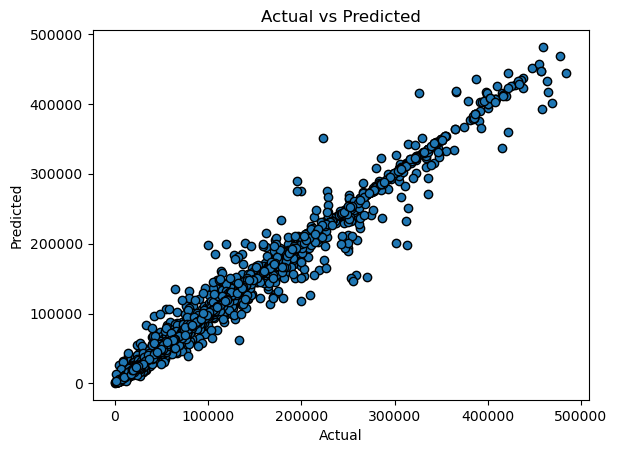

In [151]:
fig, ax = plt.subplots() 
# new figure (fig) and a single subplot (ax) within it. This subplot will be used to draw the scatter plot.
ax.scatter(arr["hg/ha_yield"], arr["yield_predicted"],edgecolors=(0, 0, 0))
# x axis actual y axis predicted values 
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

In [152]:


import numpy as np
from sklearn.metrics import r2_score

# Calculate R-squared
r2 = r2_score(arr["hg/ha_yield"], arr["yield_predicted"])
print("Coefficient of Determination (R-squared): {:.2f}".format(r2))


Coefficient of Determination (R-squared): 0.99


An R² of 1 indicates a perfect fit, meaning the model explains all the variance in the target variable.
An R² of 0 means the model does not explain any of the variance